<a href="https://colab.research.google.com/github/glaucio1973/mvp_sprint2/blob/main/MVP_SprintII_Final_para_entrega.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MVP - Sprint 2  - Machine Learning e Analytics

## Profs. Hugo Villamizar e Patrick Happ

### Aluno: Gláucio Canha


##Parte A

### 1. Definição do Problema

Este conjunto de dados foi retirado da plataforma do Kaggle, fornece uma visão abrangente dos alunos matriculados em vários cursos de graduação oferecidos em uma instituição de ensino superior. Inclui dados demográficos, fatores socioeconômicos e informações de desempenho acadêmico que podem ser usados ​​para analisar os possíveis preditores de evasão e sucesso acadêmico. Este conjunto de dados contém vários bancos de dados disjuntos que consistem em informações relevantes disponíveis no momento da inscrição, como modo de inscrição, estado civil, curso escolhido e muito mais. Adicionalmente, estes dados podem ser utilizados para estimar o desempenho global dos alunos no final de cada semestre, através da avaliação das unidades curriculares creditadas/inscritas/avaliadas/aprovadas, bem como das respetivas classificações. Finalmente, temos a taxa de desemprego, a taxa de inflação e o PIB da região, o que pode nos ajudar a entender melhor como os fatores econômicos influenciam as taxas de evasão estudantil ou os resultados de sucesso acadêmico. Esta poderosa ferramenta de análise fornecerá informações valiosas sobre o que motiva os alunos a permanecer na escola ou abandonar seus estudos para uma ampla gama de disciplinas, como agronomia, design, educação, enfermagem, jornalismo, gerenciamento, serviço social ou tecnologias

**Dicionario inicial de dados:**


| Variável | Descrição |
| --- | --- |
| Marital Status | Estado Civil (Categorica) |
| Application Mode | O Método de aplicação usado pelo estudante |
| Application Order | A ordem em que o aluno se inscreveu. (Numérico) |
| Course | O curso feito pelo aluno. (Categórico) |
| Daytime/evening attendance | Se o aluno frequenta as aulas durante o dia ou à noite. (Categórico) |
| Previous qualification |A qualificação obtida pelo aluno antes de ingressar no ensino superior. (Categórico) |
| Nacionality | Nacionalidade do aluno |
| Mother's Qualification | A qualificação da mãe do aluno. (Categórico) |
| Father's Qualification  | A qualificação da pai do aluno.(Categórico) |
| Mother's ocuppation | A ocupação da mãe do aluno. (Categórico) |
| Father's ocuppation | A ocupação da pai do aluno. (Categórico) |
| Displaced | Se o aluno é uma pessoa deslocada. (Categórico) |
| Educational special needs | Se o aluno tem alguma necessidade educacional especial. (Categórico) |
| Debtor |Se o aluno é devedor. (Categórico) |
| Tuition fees uo to date | Se as mensalidades do aluno estão em dia. (Categórico) |
| Gender | O gênero do aluno. (Categórico) |
| Scholarship holder | Se o aluno é bolsista. (Categórico) |
| Age at enrollment | A idade do aluno no momento da matrícula. (Numérico) |
| International | Se o aluno é um estudante internacional. (Categórico) |
| Curricular units 1st sem (credited) | O número de unidades curriculares creditadas pelo aluno no primeiro semestre. (Numérico) |
| Curricular units 1st sem (enrolled) | O número de unidades curriculares inscritas pelo aluno no primeiro semestre. (Numérico) |
| Curricular units 1st sem (approved) |O número de unidades curriculares avaliadas pelo aluno no primeiro semestre. (Numérico) |
| Curricular units 1st sem (grade) | O número de unidades curriculares com notas  pelo aluno no primeiro semestre. (Numérico) |
| Curricular units 2nd sem (credited) | O número de unidades curriculares creditadas pelo aluno no segundo semestre |
| Curricular units 2nd sem (enrolled) | O número de unidades curriculares inscritas pelo aluno no segundo semestre. (Numérico) |
| Curricular units 2nd sem (evaluation) | Unidades curriculares 2º semestre (avaliação) |
| Curricular units 2st sem (approved) |O número de unidades curriculares avaliadas pelo aluno no segundo semestre. (Numérico) |
| Curricular units 2nd sem (grade) |O número de unidades curriculares com notas  pelo aluno no segundo semestre. (Numérico) |
| Curricular units 2nd sem (without evaluations) |O número de unidades curriculares sem notas  pelo aluno no segundo semestre. (Numérico) |
| Unemployment rate | Indice de desempregados|
| Inflation rate | Indice de Inflação |
| GDP | PIB |
| Target | Classes - Graduados, Abandonados , Inscritos |



###Importação das bliliotecas utilizadas

In [ ]:
# configuração para não exibir os warnings
import warnings
warnings.filterwarnings("ignore")

# Imports necessários
import pandas as pd
import numpy as np
import missingno as ms # para tratamento de missings
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest # para a Seleção Univariada
from sklearn.feature_selection import f_classif # para o teste ANOVA da Seleção Univariada
from sklearn.feature_selection import RFE # para a Eliminação Recursiva de Atributo
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay
from scipy.stats import randint, uniform


### Carregando o Dataset

In [ ]:
#Carga do dataset
df = pd.read_csv("https://liessin.com.br/mvp/dataset.csv")

### Breve análise e visualização dos dados

In [ ]:
#mostrando as 5 primeiras e as 5 ultimas linhas do dataset
display(df)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


In [ ]:
# Verificando as informação e tamanho do dataset
df.shape
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [ ]:
# Verificar valores NaN
print(df.isna().sum())

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

### Visualizando as classes

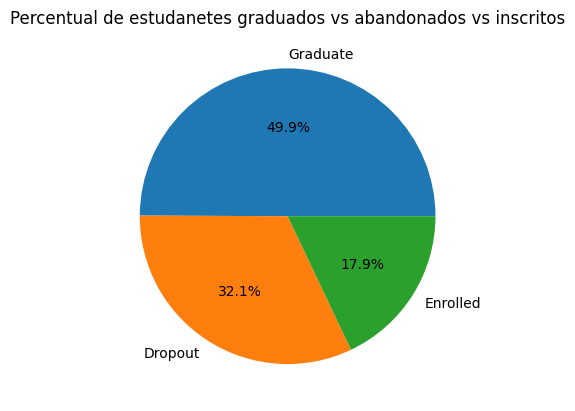

In [ ]:
#Percentual de estudanetes graduados vs abandonados vs inscritos
st_summary = df['Target'].value_counts()

plt.pie(st_summary, labels=st_summary.index, autopct='%1.1f%%')
plt.title('Percentual de estudanetes graduados vs abandonados vs inscritos')
plt.show()

Notamos as classes desbalanceadas, vamos fazer toda a preparação, processamento e treinamento do modelo com os dados desbalanceados de dados e antes do balanceamento.

### Preparação dos dados

Os atributos que trabalharemos estão todos categorizados, não sendo necessário essa etapa. Abaixo separamos os conjuntos de dados em treino e teste, holdout com estratificação, utilizando a metrica de acurácia.

In [ ]:
#Preparaçao do dados
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = df.values
X = array[:,0:34]
y = array[:,34]
X_train, X_test, y_train, y_test = train_test_split(X, y,
    test_size=test_size, shuffle=True, random_state=seed, stratify=y) # holdout com estratificação


# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

### Modelagem e Treinamento

#### Criação e avaliação de modelos: linha base

Vamos rodar alguns algoritimos de machine learning para verificar qual o melhor para criar o modelomais adequado.

LR: 0.764060 (0.013158)
KNN: 0.672223 (0.014699)
CART: 0.681272 (0.017665)
NB: 0.686070 (0.014245)
SVM: 0.735518 (0.014642)
Bagging: 0.768863 (0.017569)
RF: 0.768574 (0.013996)
ET: 0.767729 (0.017008)
Ada: 0.758966 (0.014058)
GB: 0.775922 (0.012693)
Voting: 0.759539 (0.012035)


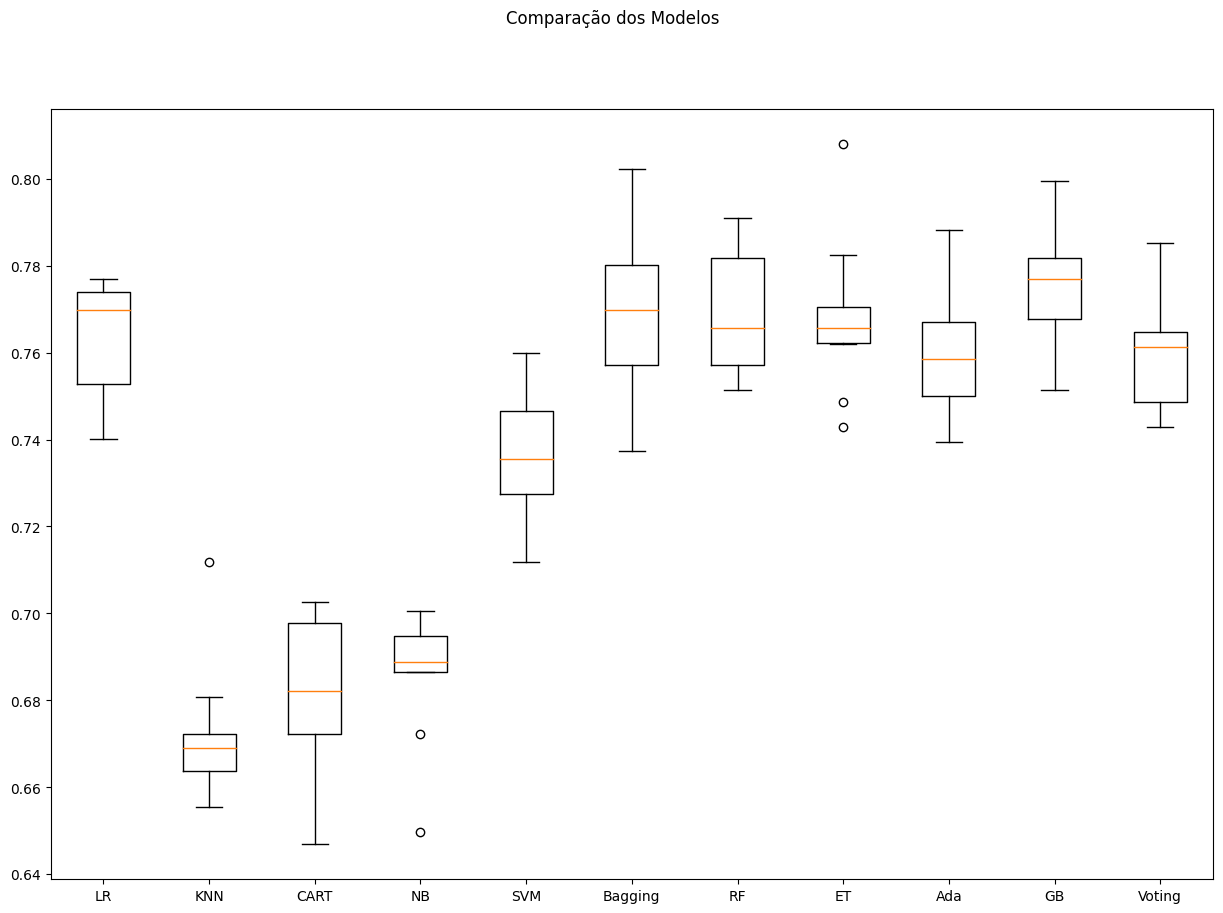

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Nesse resultado, o classificador que obteve a maior acurácia média foi novamente o Gradient Boosting (GB), com uma acurácia média de 0,775922. O Bagging também obteve uma acurácia média alta de 0,768863.

Os demais classificadores tiveram acurácias médias um pouco mais baixas, variando entre 0,764060 (Regressão Logística - LR) e 0,759539 (Voting).

Os valores entre parênteses representam os desvios padrão correspondentes à acurácia média de cada classificador. Eles indicam a variabilidade ou incerteza nos resultados.

Portanto, com base nesses resultados, o Gradient Boosting (GB) e o Bagging se destacaram como os classificadores com melhor desempenho em termos de acurácia média.
Vamos aplicar a normalização e a padronização para notar se existe alguma melhora no modelo.

LR-orig: 0.764 (0.013)
KNN-orig: 0.672 (0.015)
CART-orig: 0.681 (0.018)
NB-orig: 0.686 (0.014)
SVM-orig: 0.736 (0.015)
Bag-orig: 0.769 (0.018)
RF-orig: 0.769 (0.014)
ET-orig: 0.768 (0.017)
Ada-orig: 0.759 (0.014)
GB-orig: 0.776 (0.013)
Vot-orig: 0.760 (0.012)
LR-padr: 0.765 (0.012)
KNN-padr: 0.701 (0.018)
CART-padr: 0.678 (0.018)
NB-padr: 0.686 (0.014)
SVM-padr: 0.763 (0.014)
Bag-padr: 0.765 (0.020)
RF-padr: 0.765 (0.015)
ET-padr: 0.768 (0.014)
Ada-padr: 0.759 (0.014)
GB-padr: 0.776 (0.013)
Vot-padr: 0.768 (0.010)
LR-norm: 0.760 (0.008)
KNN-norm: 0.670 (0.017)
CART-norm: 0.682 (0.024)
NB-norm: 0.686 (0.014)
SVM-norm: 0.755 (0.013)
Bag-norm: 0.766 (0.012)
RF-norm: 0.769 (0.014)
ET-norm: 0.766 (0.014)
Ada-norm: 0.759 (0.014)
GB-norm: 0.775 (0.013)
Vot-norm: 0.762 (0.013)


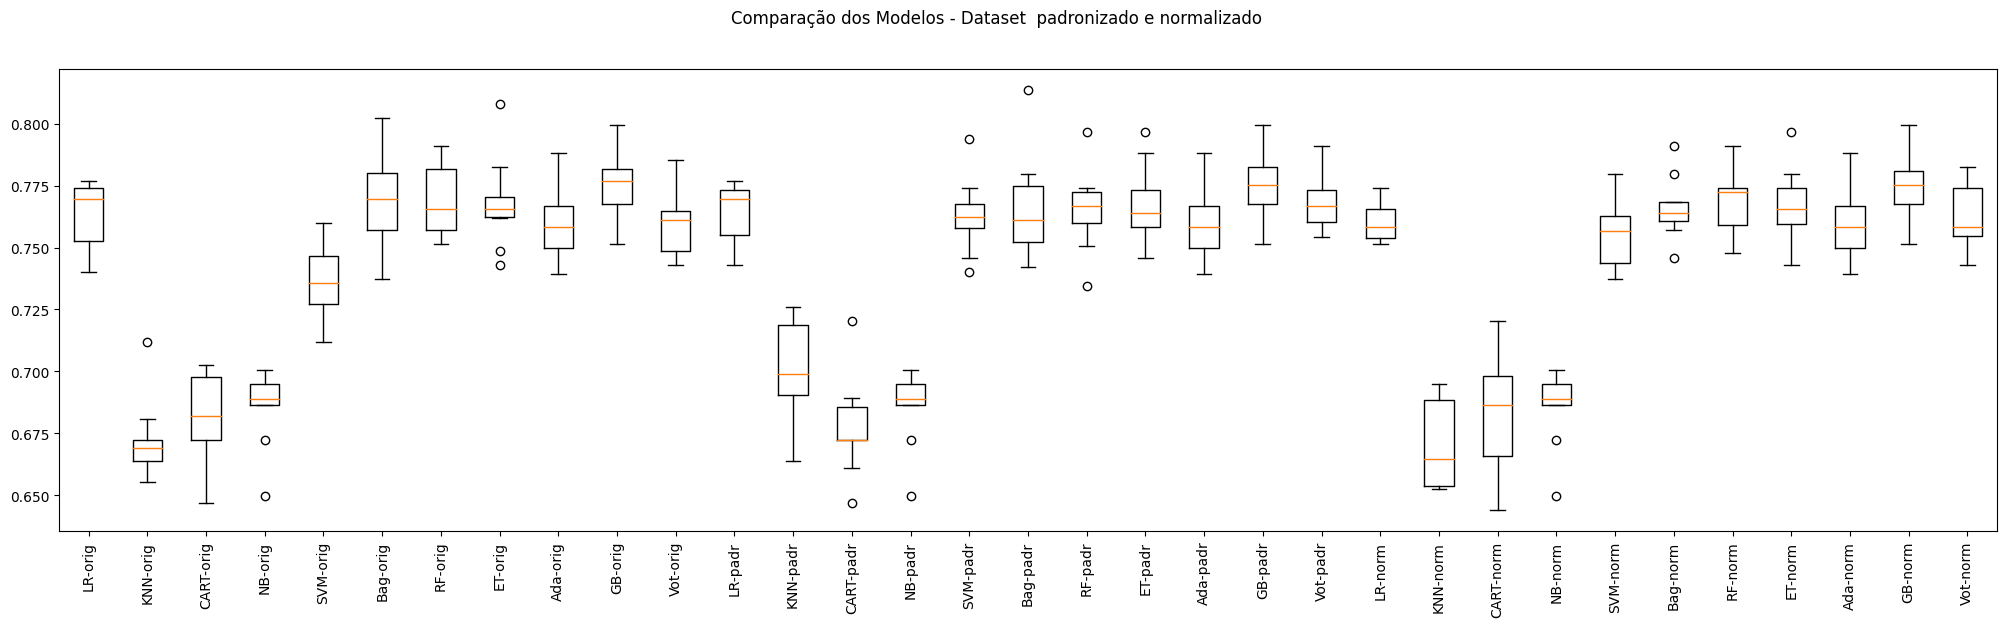

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset  padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Nesse resultado, é fornecida a acurácia média e o desvio padrão para diferentes classificadores em três conjuntos de dados diferentes: "orig" (dados originais), "padr" (dados padronizados) e "norm" (dados normatizados).

A acurácia média representa a proporção média de instâncias classificadas corretamente pelos classificadores, variando de 0 a 1, onde 1 representa uma precisão perfeita. O desvio padrão indica a dispersão dos resultados em relação à média, fornecendo uma medida de variabilidade ou incerteza em torno da acurácia média.

Comparando os resultados nos diferentes conjuntos de dados, podemos observar o seguinte:

Nos dados originais ("orig"), o classificador que obteve a maior acurácia média foi o Gradient Boosting (GB-orig) com 0,776, seguido pelo Bagging (Bag-orig) com 0,769.

Nos dados padronizados ("padr"), o Gradient Boosting (GB-padr) e o Bagging (Bag-padr) também obtiveram as maiores acurácias médias, ambas com 0,776.

Nos dados normatizados ("norm"), o Gradient Boosting (GB-norm) novamente obteve a maior acurácia média com 0,775, seguido pelo Random Forest (RF-norm) com 0,769.

Em geral, o Gradient Boosting (GB) e o Bagging são consistentemente classificadores que apresentaram bom desempenho em todas as três formas de dados (originais, padronizados e normatizados).

Vamos trabalhar os Hiperparametros para podermos tentar um melhor desempenho do modelo. Para efeito de estudo no MVP vou utilizar somente o hiperparametro no algoritimo ExtraTree e  Gradrient-Boosting, o segundo  utilizado o RandomizedSearchCV por questões de tempo.

#### Otimização dos hiperparâmetros

Executabdo o os hiperparâmetros no algoritimo ExtraTree

In [ ]:
np.random.seed(7)  # definindo uma semente global para este bloco

# Definindo os componentes do pipeline
extra_trees = ('ExtraTrees', ExtraTreesClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines = []
pipelines.append(('extra-trees-orig', Pipeline(steps=[extra_trees])))
pipelines.append(('extra-trees-padr', Pipeline(steps=[standard_scaler, extra_trees])))
pipelines.append(('extra-trees-norm', Pipeline(steps=[min_max_scaler, extra_trees])))

param_dist = {
    'ExtraTrees__n_estimators': randint(50, 200),  # Limita os valores entre 50 e 200
    'ExtraTrees__max_features': ['auto', 'sqrt', 'log2'],
    'ExtraTrees__max_depth': [3, 5, 7, None],
    'ExtraTrees__min_samples_split': randint(2, 10)
}

# Prepara e executa o RandomizedSearchCV
best_estimator = None
best_score = float('-inf')

for name, model in pipelines:
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, scoring=scoring, cv=kfold)
    random_search.fit(X_train, y_train)

    if random_search.best_score_ > best_score:
        best_score = random_search.best_score_
        best_estimator = random_search.best_estimator_
        best_estimator_name = name
print('Melhor estimador:',best_estimator_name)
# Aplica o melhor estimador aos dados de teste
y_pred = best_estimator.predict(X_test)

# Obtém os rótulos reais antes da categorização
y_labels = np.unique(y)

# Calcula a matriz de confusão
confusion_mat = confusion_matrix(y_test, y_pred)

# Crie o objeto ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=y_labels)

# Plote a matriz de confusão
plt.figure(figsize=(8, 6))
cm_display.plot(cmap="Blues")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

# Outras métricas além da acurácia
classification_rep = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(classification_rep)


Com base nesse relatório de classificação, podemos observar as métricas de avaliação para cada classe individualmente, bem como uma visão geral do desempenho médio do modelo em todas as classes.
A acurácia geral do modelo é de 0,79, o que significa que aproximadamente 79% das instâncias foram classificadas corretamente. A média não ponderada das métricas (precision, recall, f1-score) para todas as classes é de aproximadamente 0,78, enquanto a média ponderada é de aproximadamente 0,79. Isso indica que o desempenho médio do modelo é relativamente bom. Porem é necessário observar a matriz de confusão, o numero de acertos da classe Enrolled é baixo em relação as outras classes, isso se dá pelo dataset estar desbalanceado.

Vamos otimizar os hiperparâmetros com GradientBooster usnando RandomisedSerchV por questões de tempo, no estudo anterior rodei com o GridSearchCV demorou muito tempo para rodar inviabilizando o MVP.

<Figure size 800x600 with 0 Axes>

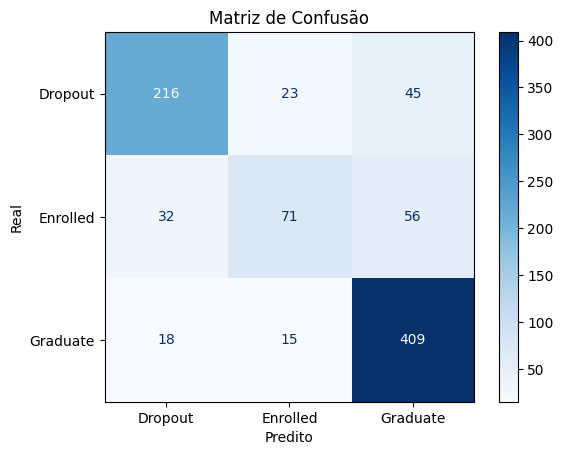

Relatório de Classificação:
              precision    recall  f1-score   support

     Dropout       0.81      0.76      0.79       284
    Enrolled       0.65      0.45      0.53       159
    Graduate       0.80      0.93      0.86       442

    accuracy                           0.79       885
   macro avg       0.76      0.71      0.72       885
weighted avg       0.78      0.79      0.78       885



In [ ]:

np.random.seed(7)  # definindo uma semente global para este bloco

# Definindo os componentes do pipeline
gradient_boost = ('GradientBoost', GradientBoostingClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines = []
pipelines.append(('gradient-boost-orig', Pipeline(steps=[gradient_boost])))
pipelines.append(('gradient-boost-padr', Pipeline(steps=[standard_scaler, gradient_boost])))
pipelines.append(('gradient-boost-norm', Pipeline(steps=[min_max_scaler, gradient_boost])))

param_dist = {
    'GradientBoost__n_estimators': randint(50, 200),  # Limita os valores entre 50 e 200
    'GradientBoost__learning_rate': uniform(0.001, 0.1),  # Faixa de valores entre 0.001 e 0.1
    'GradientBoost__max_depth': [3, 5, 7]
}

# Prepara e executa o RandomizedSearchCV
best_estimator = None
best_score = float('-inf')

for name, model in pipelines:
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, scoring=scoring, cv=kfold)
    random_search.fit(X_train, y_train)

    if random_search.best_score_ > best_score:
        best_score = random_search.best_score_
        best_estimator = random_search.best_estimator_
        best_estimator_name = name

# Aplica o melhor estimador aos dados de teste
y_pred = best_estimator.predict(X_test)

# Obtém os rótulos reais antes da categorização
y_labels = np.unique(y)

# Calcula a matriz de confusão
confusion_mat = confusion_matrix(y_test, y_pred)

# Crie o objeto ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=y_labels)

# Plote a matriz de confusão
plt.figure(figsize=(8, 6))
cm_display.plot(cmap="Blues")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

# Outras métricas além da acurácia
classification_rep = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(classification_rep)



 A acurácia geral do modelo é de 0,79, o que significa que aproximadamente 79% das instâncias foram classificadas corretamente. Não alterou nada da aplicação do modelo com hiperparametro anterior. Vamos fazer o balanceadmento do dataset e repettir todo o estudo.

#### Balanceamento do dataset e treinamento e testes.

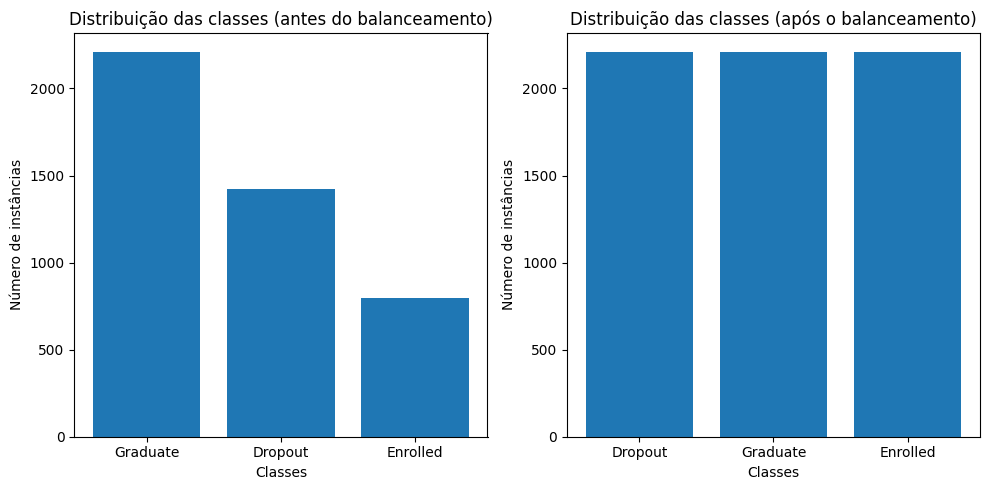

In [ ]:

# Separando as features (X) e o alvo (y)
X = df.drop('Target', axis=1)
y = df['Target']


# Aplicando o balanceamento SMOTE
smote = SMOTE(random_state=0)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Contando o número de instâncias em cada classe antes do balanceamento
classes_before = y.value_counts()


# Contando o número de instâncias em cada classe após o balanceamento
classes_after = pd.Series(y_resampled).value_counts()


# Plotando o gráfico
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(classes_before.index, classes_before.values)
plt.title('Distribuição das classes (antes do balanceamento)')
plt.xlabel('Classes')
plt.ylabel('Número de instâncias')

plt.subplot(1, 2, 2)
plt.bar(classes_after.index, classes_after.values)
plt.title('Distribuição das classes (após o balanceamento)')
plt.xlabel('Classes')
plt.ylabel('Número de instâncias')

plt.tight_layout()
plt.show()


#### Fazendo o Holdout com os dados balanceados

In [ ]:
#Preparaçao do dados
test_size = 0.20 # tamanho do conjunto de teste
seed = 7 # semente aleatória

# Separação em conjuntos de treino e teste
array = df.values
X = array[:,0:34]
y = array[:,34]


 #X_resampled e y_resampled são os dados balanceados

# Dividindo os dados balanceados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=0)

# Agora você pode usar X_train e y_train para treinar o modelo
# e X_test e y_test para avaliar o desempenho do modelo
# Parâmetros e partições da validação cruzada
scoring = 'accuracy'
num_particoes = 10
kfold = StratifiedKFold(n_splits=num_particoes, shuffle=True, random_state=seed) # validação cruzada com estratificação

Rodando os algoritimos de ML com os dados balanceados

LR: 0.755891 (0.014555)
KNN: 0.724202 (0.017307)
CART: 0.727034 (0.010975)
NB: 0.663835 (0.008710)
SVM: 0.708548 (0.015298)
Bagging: 0.818148 (0.011293)
RF: 0.831352 (0.011240)
ET: 0.842107 (0.008850)
Ada: 0.755325 (0.015918)
GB: 0.788530 (0.011683)
Voting: 0.760422 (0.014664)


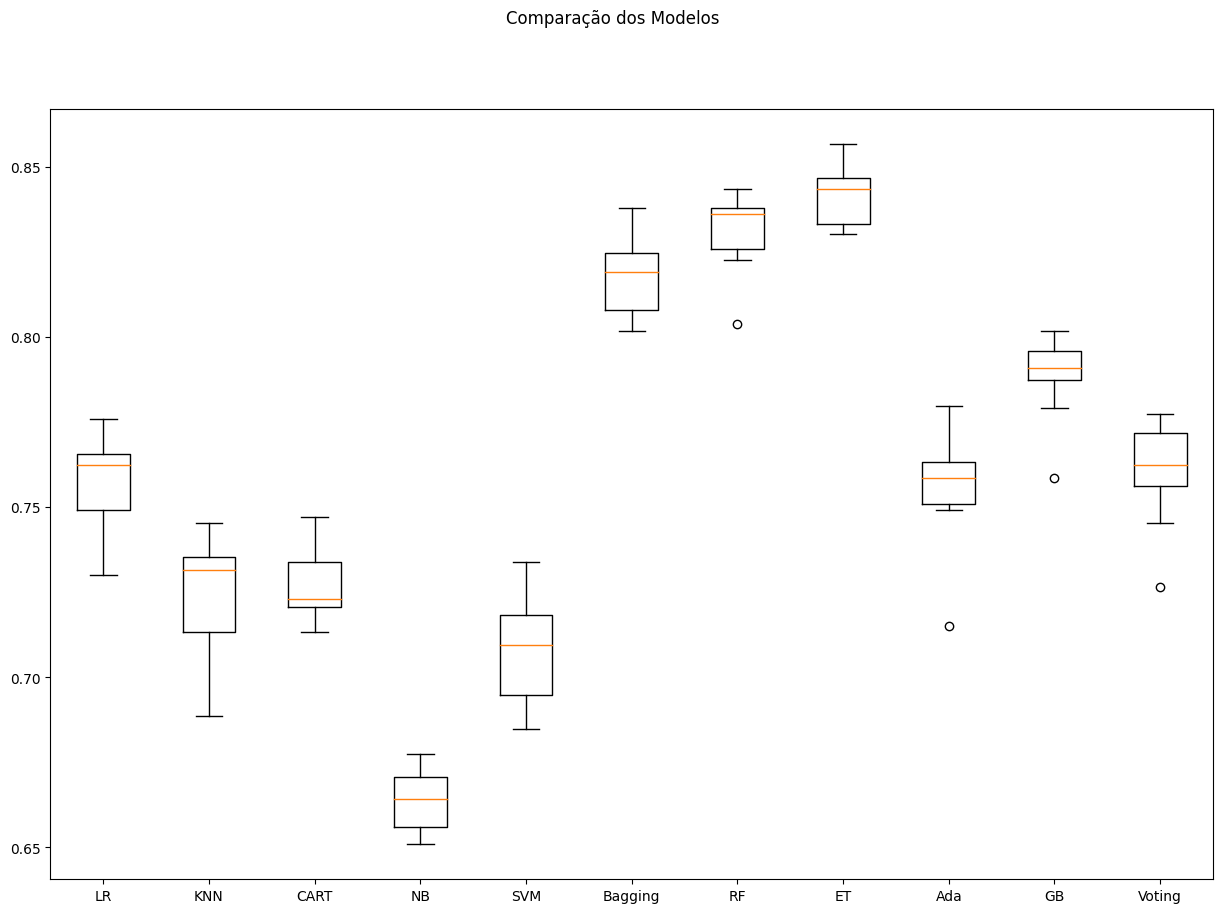

In [ ]:
np.random.seed(7) # definindo uma semente global

# Lista que armazenará os modelos
models = []

# Criando os modelos e adicionando-os na lista de modelos
models.append(('LR', LogisticRegression(max_iter=200)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# Definindo os parâmetros do classificador base para o BaggingClassifier
base = DecisionTreeClassifier()
num_trees = 100
max_features = 3

# Criando os modelos para o VotingClassifier
bases = []
model1 = LogisticRegression(max_iter=200)
bases.append(('logistic', model1))
model2 = DecisionTreeClassifier()
bases.append(('cart', model2))
model3 = SVC()
bases.append(('svm', model3))

# Criando os ensembles e adicionando-os na lista de modelos
models.append(('Bagging', BaggingClassifier(base_estimator=base, n_estimators=num_trees)))
models.append(('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features)))
models.append(('Ada', AdaBoostClassifier(n_estimators=num_trees)))
models.append(('GB', GradientBoostingClassifier(n_estimators=num_trees)))
models.append(('Voting', VotingClassifier(bases)))

# Listas para armazenar os resultados
results = []
names = []

# Avaliação dos modelos
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(15,10))
fig.suptitle('Comparação dos Modelos')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

Após rodar com os dados balancedos, com base nessas métricas, pode-se observar que os classificadores Bagging, RF e ET apresentaram as maiores acurácias médias, com valores de 0,818148, 0,831352 e 0,842107, respectivamente. Esses classificadores também exibem desvios padrão relativamente baixos, indicando uma consistência em seus resultados. Vamos aplicar a normalização e a padronização para verificar se temos alguma melhora em comparação com o original.

LR-orig: 0.756 (0.015)
KNN-orig: 0.724 (0.017)
CART-orig: 0.727 (0.011)
NB-orig: 0.664 (0.009)
SVM-orig: 0.709 (0.015)
Bag-orig: 0.818 (0.011)
RF-orig: 0.831 (0.011)
ET-orig: 0.842 (0.009)
Ada-orig: 0.755 (0.016)
GB-orig: 0.789 (0.012)
Vot-orig: 0.760 (0.015)
LR-padr: 0.757 (0.018)
KNN-padr: 0.731 (0.011)
CART-padr: 0.731 (0.010)
NB-padr: 0.664 (0.009)
SVM-padr: 0.784 (0.017)
Bag-padr: 0.819 (0.011)
RF-padr: 0.831 (0.014)
ET-padr: 0.843 (0.012)
Ada-padr: 0.755 (0.016)
GB-padr: 0.788 (0.012)
Vot-padr: 0.784 (0.017)
LR-norm: 0.749 (0.019)
KNN-norm: 0.688 (0.019)
CART-norm: 0.727 (0.011)
NB-norm: 0.664 (0.009)
SVM-norm: 0.758 (0.020)
Bag-norm: 0.813 (0.012)
RF-norm: 0.827 (0.010)
ET-norm: 0.837 (0.009)
Ada-norm: 0.755 (0.016)
GB-norm: 0.788 (0.012)
Vot-norm: 0.767 (0.020)


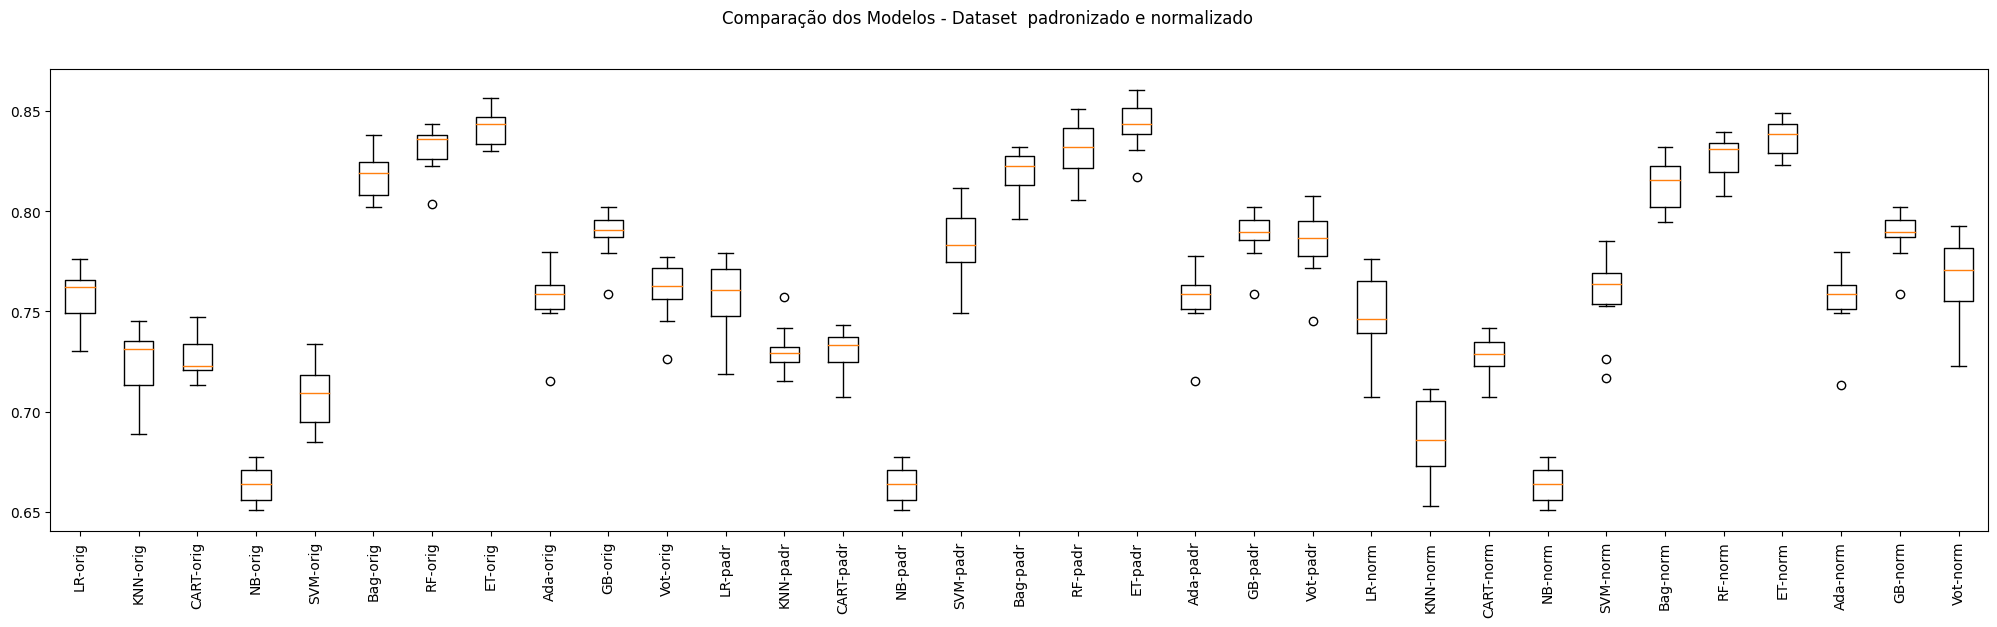

In [ ]:
np.random.seed(7) # definindo uma semente global para este bloco

# Listas para armazenar os armazenar os pipelines e os resultados para todas as visões do dataset
pipelines = []
results = []
names = []


# Criando os elementos do pipeline

# Algoritmos que serão utilizados
reg_log = ('LR', LogisticRegression(max_iter=200))
knn = ('KNN', KNeighborsClassifier())
cart = ('CART', DecisionTreeClassifier())
naive_bayes = ('NB', GaussianNB())
svm = ('SVM', SVC())
bagging = ('Bag', BaggingClassifier(base_estimator=base, n_estimators=num_trees))
random_forest = ('RF', RandomForestClassifier(n_estimators=num_trees, max_features=max_features))
extra_trees = ('ET', ExtraTreesClassifier(n_estimators=num_trees, max_features=max_features))
adaboost = ('Ada', AdaBoostClassifier(n_estimators=num_trees))
gradient_boosting = ('GB', GradientBoostingClassifier(n_estimators=num_trees))
voting = ('Voting', VotingClassifier(bases))

# Transformações que serão utilizadas
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())


# Montando os pipelines

# Dataset original
pipelines.append(('LR-orig', Pipeline([reg_log])))
pipelines.append(('KNN-orig', Pipeline([knn])))
pipelines.append(('CART-orig', Pipeline([cart])))
pipelines.append(('NB-orig', Pipeline([naive_bayes])))
pipelines.append(('SVM-orig', Pipeline([svm])))
pipelines.append(('Bag-orig', Pipeline([bagging])))
pipelines.append(('RF-orig', Pipeline([random_forest])))
pipelines.append(('ET-orig', Pipeline([extra_trees])))
pipelines.append(('Ada-orig', Pipeline([adaboost])))
pipelines.append(('GB-orig', Pipeline([gradient_boosting])))
pipelines.append(('Vot-orig', Pipeline([voting])))

# Dataset Padronizado
pipelines.append(('LR-padr', Pipeline([standard_scaler, reg_log])))
pipelines.append(('KNN-padr', Pipeline([standard_scaler, knn])))
pipelines.append(('CART-padr', Pipeline([standard_scaler, cart])))
pipelines.append(('NB-padr', Pipeline([standard_scaler, naive_bayes])))
pipelines.append(('SVM-padr', Pipeline([standard_scaler, svm])))
pipelines.append(('Bag-padr', Pipeline([standard_scaler, bagging])))
pipelines.append(('RF-padr', Pipeline([standard_scaler, random_forest])))
pipelines.append(('ET-padr', Pipeline([standard_scaler, extra_trees])))
pipelines.append(('Ada-padr', Pipeline([standard_scaler, adaboost])))
pipelines.append(('GB-padr', Pipeline([standard_scaler, gradient_boosting])))
pipelines.append(('Vot-padr', Pipeline([standard_scaler, voting])))

# Dataset Normalizado
pipelines.append(('LR-norm', Pipeline([min_max_scaler, reg_log])))
pipelines.append(('KNN-norm', Pipeline([min_max_scaler, knn])))
pipelines.append(('CART-norm', Pipeline([min_max_scaler, cart])))
pipelines.append(('NB-norm', Pipeline([min_max_scaler, naive_bayes])))
pipelines.append(('SVM-norm', Pipeline([min_max_scaler, svm])))
pipelines.append(('Bag-norm', Pipeline([min_max_scaler, bagging])))
pipelines.append(('RF-norm', Pipeline([min_max_scaler, random_forest])))
pipelines.append(('ET-norm', Pipeline([min_max_scaler, extra_trees])))
pipelines.append(('Ada-norm', Pipeline([min_max_scaler, adaboost])))
pipelines.append(('GB-norm', Pipeline([min_max_scaler, gradient_boosting])))
pipelines.append(('Vot-norm', Pipeline([min_max_scaler, voting])))

# Executando os pipelines
for name, model in pipelines:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %.3f (%.3f)" % (name, cv_results.mean(), cv_results.std()) # formatando para 3 casas decimais
    print(msg)

# Boxplot de comparação dos modelos
fig = plt.figure(figsize=(25,6))
fig.suptitle('Comparação dos Modelos - Dataset  padronizado e normalizado')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names, rotation=90)
plt.show()

Nos dados originais ("orig"), observamos que o Extra Trees (ET-orig) obteve a maior acurácia média de 0,842, seguido pelo Random Forest (RF-orig) com 0,831 e Gradient Boosting (GB-orig) com 0,789. Esses três classificadores também apresentam desvios padrão relativamente baixos, indicando consistência nos resultados.

Nos dados padronizados ("padr"), o Extra Trees (ET-padr) também obteve a maior acurácia média de 0,843, seguido pelo Random Forest (RF-padr) com 0,831 e Bagging (Bag-padr) com 0,819. Esses resultados são semelhantes aos obtidos nos dados originais, sugerindo que a padronização dos dados não teve um impacto significativo no desempenho desses classificadores.

Nos dados normatizados ("norm"), o Extra Trees (ET-norm) novamente obteve a maior acurácia média de 0,837, seguido pelo Random Forest (RF-norm) com 0,827 e Gradient Boosting (GB-norm) com 0,788. Comparando com os dados originais, observamos uma queda marginal no desempenho do Extra Trees e do Random Forest, enquanto o Gradient Boosting se manteve praticamente inalterado.

Em geral, o Extra Trees, Random Forest e Gradient Boosting se destacaram como os classificadores com melhor desempenho em diferentes conjuntos de dados (originais, padronizados e normatizados). O desempenho desses classificadores foi consistente em diferentes configurações de dados, o que sugere sua robustez.
Vamos aplicar o hiperparametro para esse algoritimo para ver se conseguimos alguma melhora.

In [ ]:
#Aplicação de Hiperparametros

np.random.seed(7)  # definindo uma semente global para este bloco

# Definindo os componentes do pipeline
extra_trees = ('ExtraTrees', ExtraTreesClassifier())
standard_scaler = ('StandardScaler', StandardScaler())
min_max_scaler = ('MinMaxScaler', MinMaxScaler())

pipelines = []
pipelines.append(('extra-trees-orig', Pipeline(steps=[extra_trees])))
pipelines.append(('extra-trees-padr', Pipeline(steps=[standard_scaler, extra_trees])))
pipelines.append(('extra-trees-norm', Pipeline(steps=[min_max_scaler, extra_trees])))

param_dist = {
    'ExtraTrees__n_estimators': randint(50, 200),  # Limita os valores entre 50 e 200
    'ExtraTrees__max_features': ['auto', 'sqrt', 'log2'],
    'ExtraTrees__max_depth': [3, 5, 7, None],
    'ExtraTrees__min_samples_split': randint(2, 10)
}

# Prepara e executa o RandomizedSearchCV
best_estimator = None
best_score = float('-inf')

for name, model in pipelines:
    random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist, n_iter=10, scoring=scoring, cv=kfold)
    random_search.fit(X_train, y_train)

    if random_search.best_score_ > best_score:
        best_score = random_search.best_score_
        best_estimator = random_search.best_estimator_
        best_estimator_name = name
print('Melhor estimador:',best_estimator_name)
# Aplica o melhor estimador aos dados de teste
y_pred = best_estimator.predict(X_test)

# Obtém os rótulos reais antes da categorização
y_labels = np.unique(y)

# Calcula a matriz de confusão
confusion_mat = confusion_matrix(y_test, y_pred)

# Crie o objeto ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=y_labels)

# Plote a matriz de confusão
plt.figure(figsize=(8, 6))
cm_display.plot(cmap="Blues")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de Confusão")
plt.show()

# Outras métricas além da acurácia
classification_rep = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(classification_rep)

Em geral, o modelo apresenta um bom desempenho com valores de precisão, recall e F1-score elevados para todas as classes com o balanceamento dos dados. A acurácia média e as métricas agregadas também demonstram um desempenho consistente em todas as classes. Portanto, com base nessas métricas, podemos concluir que o modelo teve um bom desempenho na tarefa de classificação dessas três classes. Podemos concluir a necessidade de deixarmos os dados balanceados para o modelo obter melhor resultado.

####Feature Selection

Aplicando Feature Selection para verificar se melhoramos o desempenho do modelo

In [ ]:
from sklearn.feature_selection import SelectFromModel

extra_trees = ExtraTreesClassifier()
feature_selection = SelectFromModel(extra_trees)

pipelines = []
pipelines.append(('extra-trees-orig', Pipeline(steps=[('FeatureSelection', feature_selection), ('ExtraTrees', extra_trees)])))
pipelines.append(('extra-trees-padr', Pipeline(steps=[('StandardScaler', standard_scaler), ('FeatureSelection', feature_selection), ('ExtraTrees', extra_trees)])))
pipelines.append(('extra-trees-norm', Pipeline(steps=[('MinMaxScaler', min_max_scaler), ('FeatureSelection', feature_selection), ('ExtraTrees', extra_trees)])))



from sklearn.feature_selection import SelectFromModel

# Crie um novo estimador ExtraTreesClassifier
extra_trees = ExtraTreesClassifier()

# Execute a seleção de características nos dados de treinamento
feature_selection = SelectFromModel(extra_trees)
X_train_selected = feature_selection.fit_transform(X_train, y_train)

# Defina os parâmetros para o RandomizedSearchCV
param_dist = {
    'n_estimators':randint(50, 200),
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': randint(2, 10)
}

# Crie um novo estimador ExtraTreesClassifier com os parâmetros otimizados
best_estimator = ExtraTreesClassifier()
random_search = RandomizedSearchCV(estimator=best_estimator, param_distributions=param_dist, n_iter=10, scoring=scoring, cv=kfold)
random_search.fit(X_train_selected, y_train)

# Obtenha as melhores características selecionadas
best_features = feature_selection.get_support()
X_test_selected = X_test.iloc[:, best_features]

# Faça a previsão nos dados de teste com as características selecionadas
y_pred = random_search.best_estimator_.predict(X_test_selected)

# Obtém os rótulos reais antes da categorização
y_labels = np.unique(y)

# Calcula a matriz de confusão
confusion_mat = confusion_matrix(y_test, y_pred)

# Crie o objeto ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=y_labels)

# Plote a matriz de confusão
plt.figure(figsize=(8, 6))
cm_display.plot(cmap="Blues")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.title("Matriz de ConfusãO Após o Feature Selection")
plt.show()

# Outras métricas além da acurácia
classification_rep = classification_report(y_test, y_pred)
print("Relatório de Classificação:")
print(classification_rep)

Ao comparar os resultados antes e depois da aplicação do método de feature selection, observamos que houve algumas mudanças nas métricas de avaliação. A precisão para a classe "Dropout" aumentou de 0,90 para 0,91, enquanto a precisão para a classe "Enrolled" diminuiu de 0,81 para 0,78. O recall para a classe "Dropout" diminuiu de 0,83 para 0,80, enquanto o recall para as classes "Enrolled" e "Graduate" permaneceram praticamente inalterados. O F1-score para as classes "Dropout" e "Graduate" permaneceu o mesmo, enquanto o F1-score para a classe "Enrolled" diminuiu ligeiramente.

Em termos de acurácia geral, houve uma diminuição de 0,01, de 0,85 para 0,84.


Portanto, podemos observar que o método de feature selection afetou ligeiramente as métricas de avaliação do modelo, resultando em algumas alterações nas precisões, recalls, F1-scores e acurácia.

Abaixo faço um grafico entre a acuracia de teste e treino, podemos dizer que o modelo está apresentando um pequeno grau de overfitting. A diferença entre as duas acurácias não é muito grande, o que indica que o modelo tem um desempenho razoável tanto nos dados de treinamento quanto nos dados de teste.

In [ ]:
from sklearn.model_selection import cross_val_score

# Lista para armazenar os scores de treinamento e teste
train_scores = []
test_scores = []

# Defina uma lista de valores para o número de estimadores
n_estimators = [50, 100, 150, 200]

# Itere sobre os valores de n_estimators
for n in n_estimators:
    # Crie um novo estimador ExtraTreesClassifier com o número de estimadores atual
    extra_trees = ExtraTreesClassifier(n_estimators=n)

    # Execute a validação cruzada e obtenha os scores de treinamento e teste
    train_score = cross_val_score(extra_trees, X_train, y_train, cv=5, scoring='accuracy').mean()
    test_score = cross_val_score(extra_trees, X_test, y_test, cv=5, scoring='accuracy').mean()

    # Armazene os scores na lista
    train_scores.append(train_score)
    test_scores.append(test_score)

# Plote o gráfico de linha comparando os dados de treinamento e teste
plt.plot(n_estimators, train_scores, label='Treino')
plt.plot(n_estimators, test_scores, label='Teste')
plt.xlabel('Número de Estimadores')
plt.ylabel('Acurácia Média')
plt.title('Desempenho do Modelo - Treino vs. Teste')
plt.legend()
plt.show()


#### Finalização do Modelo

In [ ]:
from sklearn.metrics import accuracy_score
from joblib import dump
best_model = None
best_accuracy = 0.0

# Definir uma lista de tuplas contendo o nome do modelo e o objeto do modelo
models = [
    ('Regressão Logística', LogisticRegression(max_iter=200)),
    ('Gradient Boost', GradientBoostingClassifier()),
    ('SVC', SVC())
]

# Preparar o modelo e avaliá-lo para cada tupla na lista
for model_name, model in models:
    scaler = StandardScaler().fit(X_train)  # ajuste do scaler com o conjunto de treino
    rescaledX = scaler.transform(X_train)  # aplicação da padronização no conjunto de treino
    model.fit(rescaledX, y_train)

    rescaledTestX = scaler.transform(X_test)  # aplicação da padronização no conjunto de teste
    predictions = model.predict(rescaledTestX)
    accuracy = accuracy_score(y_test, predictions)

    print(f"Acurácia do modelo {model_name}: {accuracy}")

    # Verificar se a acurácia atual é melhor do que a melhor acurácia anterior
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = model

# Salvar o melhor modelo
if best_model is not None:
    dump(best_model, 'melhor_modelo.joblib')
    print("Melhor modelo salvo com sucesso: ", best_model)



Acurácia do modelo Regressão Logística: 0.7496229260935143
Acurácia do modelo Gradient Boost: 0.803921568627451
Acurácia do modelo SVC: 0.7933634992458521
Melhor modelo salvo com sucesso:  GradientBoostingClassifier()


### Conclusão

Portanto, a conclusão geral é que o modelo Gradient Boosting é uma escolha sólida para esse problema de classificação. Ele apresenta um desempenho equilibrado em termos de acurácia, precisão, revocação e valor F1-Score, o que sugere que é capaz de lidar adequadamente com os dados e fazer previsões confiáveis.

##Parte B

### Classificador de imagens binária - Carros VS Caminhonetes (SUV)

### 1. Definição do Problema

Utilizei o dataset do repositório do kaggle, sem uma descrição definida. Basicamente um problema de visão computacional para destinguir a imagem se é um carro (car) ou uma SUV (truck). Aplicaremos alumas tecnicas aprendidas no curso para indentificar e classificar a imagem de uma forma acertiva atravé de modelos de machine learning.

### 1. Importando as bibliotecas necessárias para executar o notebook



In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from tensorflow.keras.preprocessing import image
import os
from sklearn.model_selection import train_test_split
import shutil
import random
import math
import numpy as np
import zipfile
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as skm
import itertools
import urllib.request
import zipfile
from keras.preprocessing.image import ImageDataGenerator
from keras import layers
from keras import models
from keras import optimizers
from tensorflow.keras.preprocessing import image
import os
from sklearn.model_selection import train_test_split
import shutil
import random
import math
import numpy as np
import zipfile
import pandas as pd
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report
import sklearn.metrics as skm
import itertools
import numpy as np
import matplotlib.pyplot as plt


#### Utilidades

`plot_confusion_matrix` é uma função python que imprime uma matriz de confusão

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    Esta função imprime e plota a matriz de confusão.
    A normalização pode ser aplicada definindo `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de confusão normalizada")
    else:
        print('Matriz de confusão sem normalização')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Label real')
    plt.xlabel('Label predito')

### 2. Acessando e tratando os dados que serão a entrada do modelo de deep learning

In [ ]:
#Descompactando os arquivos de imagens
url = 'https://liessin.com.br/mvp/sprint2/car-or-truck.zip'
nome_arquivo_zip = 'car-or-truck.zip'
diretorio_destino = './mvp/'  # Diretório onde os arquivos serão extraídos

# Baixa o arquivo ZIP da URL
urllib.request.urlretrieve(url, nome_arquivo_zip)

# Extrai o conteúdo do arquivo ZIP
with zipfile.ZipFile(nome_arquivo_zip, 'r') as zip_ref:
    zip_ref.extractall(diretorio_destino)

print('Arquivos descompactados com sucesso!')

Arquivos descompactados com sucesso!


Após a descompactação do arquivo faço um processo para renomea-los conforme o nome da pasta.

In [ ]:
#Renomeando as Imagens
diretorio_destino = './mvp/'

def renomear_imagens(diretorio):
    for nome in os.listdir(diretorio):
        caminho_origem = os.path.join(diretorio, nome)
        if os.path.isfile(caminho_origem) and nome.lower().endswith(('.jpeg', '.jpg')):
            nome_pasta = os.path.basename(diretorio)
            extensao = nome.split('.')[-1].lower()
            sequencial = 1
            while True:
                sequencial_formatado = str(sequencial).zfill(5)
                novo_nome = f"{nome_pasta}.{sequencial_formatado}.{extensao}"
                caminho_destino = os.path.join(diretorio, novo_nome)
                if not os.path.exists(caminho_destino):
                    break
                sequencial += 1
            os.rename(caminho_origem, caminho_destino)
            #print(f"Renomeado: {nome} -> {novo_nome}")
        elif os.path.isdir(caminho_origem):
            renomear_imagens(caminho_origem)

renomear_imagens(diretorio_destino)
print('Arquivos renomeados')


Arquivos renomeados


Agara vamos mover todos os arquivos imagem de carros e SUVs para pastas principais train e valid (Treino e validação)

In [ ]:
#Movendo as imagens de carros e caminhonetes para as pastas de treino e validação
import os
import shutil
#Treino
diretorio_origem_car = './mvp/train/Car'
diretorio_origem_truck = './mvp/train/Truck'
diretorio_destino = './mvp/train'

# Mover imagens "Car" para o diretório de destino
imagens_car = os.listdir(diretorio_origem_car)
for imagem in imagens_car:
    caminho_origem = os.path.join(diretorio_origem_car, imagem)
    caminho_destino = os.path.join(diretorio_destino, imagem)
    shutil.move(caminho_origem, caminho_destino)

# Mover imagens "Truck" para o diretório de destino
imagens_truck = os.listdir(diretorio_origem_truck)
for imagem in imagens_truck:
    caminho_origem = os.path.join(diretorio_origem_truck, imagem)
    caminho_destino = os.path.join(diretorio_destino, imagem)
    shutil.move(caminho_origem, caminho_destino)

# Remover os diretórios de origem
os.rmdir(diretorio_origem_car)
os.rmdir(diretorio_origem_truck)

#Validação

diretorio_origem_car = './mvp/valid/Car'
diretorio_origem_truck = './mvp/valid/Truck'
diretorio_destino = './mvp/valid'

# Mover imagens "Car" para o diretório de destino
imagens_car = os.listdir(diretorio_origem_car)
for imagem in imagens_car:
    caminho_origem = os.path.join(diretorio_origem_car, imagem)
    caminho_destino = os.path.join(diretorio_destino, imagem)
    shutil.move(caminho_origem, caminho_destino)

# Mover imagens "Truck" para o diretório de destino
imagens_truck = os.listdir(diretorio_origem_truck)
for imagem in imagens_truck:
    caminho_origem = os.path.join(diretorio_origem_truck, imagem)
    caminho_destino = os.path.join(diretorio_destino, imagem)
    shutil.move(caminho_origem, caminho_destino)

# Remover os diretórios de origem
os.rmdir(diretorio_origem_car)
os.rmdir(diretorio_origem_truck)
print('Arquivos movidos para a pasta principal')

Arquivos movidos para a pasta principal


Faço uma listagem dos arquivos que estão nas pastas train e valid

In [ ]:
#Lista 20 imagens aleatorias de cada diretorio de treino e validação

import os
import random

diretorio_train = './mvp/train'
diretorio_valid = './mvp/valid'
num_amostras = 20

def listar_nomes_imagens_aleatorias(diretorio, quantidade):
    nomes_imagens = []
    for raiz, diretorios, arquivos in os.walk(diretorio):
        for nome_arquivo in arquivos:
            if nome_arquivo.lower().endswith(('.jpeg', '.jpg')):
                caminho_imagem = os.path.join(raiz, nome_arquivo)
                nomes_imagens.append(caminho_imagem)

    if len(nomes_imagens) <= quantidade:
        return nomes_imagens
    else:
        return random.sample(nomes_imagens, quantidade)

imagens_amostra_train = listar_nomes_imagens_aleatorias(diretorio_train, num_amostras)
imagens_amostra_valid = listar_nomes_imagens_aleatorias(diretorio_valid, num_amostras)

print(f"Amostras das imagens do diretório '{diretorio_train}':")
for imagem in imagens_amostra_train:
    print(imagem)

print()

print(f"Amostras das imagens do diretório '{diretorio_valid}':")
for imagem in imagens_amostra_valid:
    print(imagem)


#### Verificando a quantidade de imagens das duas classes no diretorio de treino e validação


In [ ]:
#verificando as quantidade de imagens de treino e de validação
import os

diretorio_base = './mvp'

def contar_imagens(diretorio):
    total_imagens = 0
    for raiz, diretorios, arquivos in os.walk(diretorio):
        for arquivo in arquivos:
            if arquivo.lower().endswith(('.jpeg', '.jpg')):
                total_imagens += 1
    return total_imagens

# Percorrer os diretórios em ./mvp
for diretorio in os.listdir(diretorio_base):
    diretorio_path = os.path.join(diretorio_base, diretorio)
    if os.path.isdir(diretorio_path):
        total = contar_imagens(diretorio_path)
        print(f"Total de imagens em {diretorio}: {total}")

Criando dataframes com as informações das imagens para train e valid

In [ ]:
#Criando o Dataframe com as imagens de treino e teste

import os
import pandas as pd

diretorio_train = './mvp/train'
diretorio_valid = './mvp/valid'

def criar_dataframe(diretorio):
    dados = []
    for raiz, diretorios, arquivos in os.walk(diretorio):
        for nome_arquivo in arquivos:
            if nome_arquivo.lower().endswith(('.jpeg', '.jpg')):
                caminho_imagem = os.path.join(raiz, nome_arquivo)
                dados.append({'Diretório': raiz, 'Imagem': nome_arquivo})
    return pd.DataFrame(dados)

df_train = criar_dataframe(diretorio_train)
df_valid = criar_dataframe(diretorio_valid)

print("Dataframe com as imagens do diretório 'train':")
display(df_train)

print("\nDataframe com as imagens do diretório 'valid':")
display(df_valid)


Criando os atributos necessários para desenvolver o trabalho

In [ ]:
#Criando os Atributos de Largura, Altura, Imagem, Canais, Classe
import os
import pandas as pd
from PIL import Image

diretorio_train = './mvp/train'
diretorio_valid = './mvp/valid'

dados_imagens_train = []
dados_imagens_valid = []

def processar_imagens(diretorio, dados_imagens):
    for raiz, diretorios, arquivos in os.walk(diretorio):
        for arquivo in arquivos:
            if arquivo.lower().endswith(('.jpeg', '.jpg')):
                caminho_arquivo = os.path.join(raiz, arquivo)
                with Image.open(caminho_arquivo) as img:
                    largura, altura = img.size
                    canais = img.mode
                    classe = 'Car' if 'car' in arquivo.lower() else 'Truck'
                    dados_imagens.append({'Imagem': arquivo, 'Largura': largura, 'Altura': altura, 'Canais': canais, 'Classe': classe})

processar_imagens(diretorio_train, dados_imagens_train)
processar_imagens(diretorio_valid, dados_imagens_valid)

df_train = pd.DataFrame(dados_imagens_train)
df_valid = pd.DataFrame(dados_imagens_valid)

print('DataFrames com os campos adicionados')


DataFrames com os campos adicionados


Visualização dos datasets com os atributos criados

In [ ]:
print("Dataframe com as imagens do diretório de treinamento:")
display(df_train)

print("\nDataframe com as imagens do diretório de validação:")
display(df_valid)

Plotando um gráfico de barras empilhado com o numero de imagens por classe.

In [ ]:
# Contagem das classes
contagem_classes_train = df_train['Classe'].value_counts()
contagem_classes_valid = df_valid['Classe'].value_counts()

# Plotagem do gráfico de barras
fig, ax = plt.subplots()
bar_plot_train = contagem_classes_train.plot(kind='bar', ax=ax, color='blue', label='Train')
bar_plot_valid = contagem_classes_valid.plot(kind='bar', ax=ax, color='orange', label='Valid')

# Configurações do gráfico
ax.set_title('Cars vs Trucks - Dados Disponíveis')
ax.set_xlabel('Classe')
ax.set_ylabel('Contagem')

# Configuração da legenda
ax.legend()

# Exibição do gráfico
plt.show()

Visualizando algumas imagens do conjunto de dados de treino

In [ ]:

#setando o diretorio onde se encontram as imagens
diretorio_train = './mvp/train'
#Setando o numero de imagens  serem exibidas
num_imagens = 20
#determinando o tamanho da imagem
tamanho_imagem = (128, 128)

# Selecionar aleatoriamente 20 índices de imagens do df_train
indices_aleatorios = random.sample(range(len(df_train)), num_imagens)

# Configurar a figura para exibir as imagens
fig, axs = plt.subplots(4, 5, figsize=(12, 8))
fig.subplots_adjust(hspace=0.4)

# Plotar as imagens selecionadas aleatoriamente
for i, indice in enumerate(indices_aleatorios):
    imagem = df_train.loc[indice, 'Imagem']
    caminho_imagem = os.path.join(diretorio_train, imagem)
    img = Image.open(caminho_imagem)
    img = img.resize(tamanho_imagem)

    linha = i // 5
    coluna = i % 5

    axs[linha, coluna].imshow(img)
    axs[linha, coluna].set_title(df_train.loc[indice, 'Classe'])
    axs[linha, coluna].axis('off')

plt.show()


Divisão dos dados em treino e teste: 30% das imagens para teste e 70% para treinamento do modelo de deep learning. Importante lembrar que os conjuntos devem ser disjuntos, ou seja, não devem poussir nenhum elemento em comum

In [ ]:
from sklearn.model_selection import train_test_split

# Definir os campos a serem usados para a separação
features = ['Imagem', 'Classe']

# Separar os conjuntos de treino e teste
train, test = train_test_split(df_train[features], test_size=0.3, random_state=42)

Visualizando a divisão dos dados de treino e de teste

In [ ]:
# Exibir informações sobre os conjuntos de treino e teste
print("Conjunto de Treino:")
display(train)
print("")

print("Conjunto de Teste:")
display(test)

Vamos utilizaar uma técnica amplamente utilizada no campo de aprendizado de máquina e visão computacional para aumentar a diversidade e a quantidade de dados de treinamento, aplicando transformações às imagens existentes. A técnica utilizada é o data augmentation, sob demanda durante o treinamento do modelo.


In [ ]:
import os
import pandas as pd
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
diretorio_train = './mvp/train'
diretorio_valid = './mvp/valid'
target_size = (128, 128) # Dimensões desejadas das imagens (largura, altura)
batch_size = 32  # Tamanho do lote de dados

# Configurar o ImageDataGenerator com split de validação e parâmetros solicitados
print('Configurando o ImageDataGenerator')
train_datagen = ImageDataGenerator(validation_split=0.2,
                             rescale=1.0/255,
                             rotation_range=48,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

print('---------------------------')

print('Gerando dados teste')
test_datagen=ImageDataGenerator(rescale=1./255)
print('---------------------------- ')
# Gerar os dados de treino
print('Gerando dados de treino')
train_generator=train_datagen.flow_from_dataframe(
    train ,diretorio_train,
    target_size=(128,128),
    batch_size=50,
    class_mode='binary',
    x_col='Imagem',
    y_col='Classe',
    subset='training' #training set
    )

print('---------------------------')


# Gerar os dados de validação
print('Gerando dados de validação')
val_generator=train_datagen.flow_from_dataframe(
    train ,diretorio_train,
    target_size=(128,128),
    batch_size=50,
    class_mode='binary',
    x_col='Imagem',
    y_col='Classe',
    subset='validation' #validation  set
    )
print('------------------------------')

# Gerar os dados de teste

print('Gerando dados de Teste')

test_generator=train_datagen.flow_from_dataframe(
    test ,diretorio_train,
    target_size=(128,128),
    batch_size=50,
    class_mode='binary',
    x_col='Imagem',
    y_col='Classe',
    subset='training') #teste

print('------------------------------')

Visualizando um exemplo do tratamento das imagens

In [ ]:

# Pegando um registro do dataframe
sample = df_train.sample(n=1)

# Neste caso o tipo de classe é categorico, pois temos um exemplo com apenas uma classe
sample_generator = train_datagen.flow_from_dataframe(
    sample,
    diretorio_train,
    x_col='Imagem',
    y_col='Classe',
    target_size=(128,128),
    class_mode='categorical'
)

plt.figure(figsize=(12, 9))
for i in range(9):
    plt.subplot(3, 3, i+1)
    for x_batch, y_batch in sample_generator:
        Imagem = x_batch[0]
        plt.imshow(Imagem)
        plt.axis('Off')
        break
plt.tight_layout()
plt.show()

###Configuração de um modelo de deep learning usando uma rede neural convolucional (CNN) simples com a biblioteca Keras

#### Definição da arquitetura do modelo

Aqui é especificada uma `camada convolucional 2D` que possui 32 filtros, um tamanho de filtro de 3x3 que usa a função de ativação `ReLU`. O parâmetro `input_shape` define a forma das imagens de entrada para a rede. Na sequência são adicionadas camadas `max-pooling` com a mesma função de ativação.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Crie o modelo da CNN
model = Sequential()

# Adicione as camadas convolucionais
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

# Flatten
model.add(Flatten())

# Adicione camadas densas
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Para um problema de classificação binária

model.summary()

###Treinamento do modelo de deep learning

#### Compilação do modelo Keras com as configurações do treinamento

`optimizer='adam'`: especifica o otimizador a ser usado durante o treinamento.

`loss='binary_crossentropy'`: especifica a função de perda a ser usada durante o treinamento. Para problemas de classificação binária, onde a variável alvo tem apenas duas categorias, a perda binária de entropia cruzada é freqüentemente empregada.

`metrics=['accuracy']`: especifica as métricas de avaliação a serem usadas durante o treinamento e o teste.

In [ ]:
# Compile o modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

O método fit() inicia o processo de treinamento do modelo usando o gerador de dados para o treinamento train_generator e o gerador de dados de validação val_generator.
Criado uma função para guardar as métricas de treinamento e validação.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import Callback

# Criar um callback personalizado para salvar as métricas de treinamento e validação
class MetricsCallback(Callback):
    def __init__(self):
        self.train_accuracy = []
        self.val_accuracy = []
        self.train_loss = []
        self.val_loss = []

    def on_epoch_end(self, epoch, logs=None):
        self.train_accuracy.append(logs['accuracy'])
        self.val_accuracy.append(logs['val_accuracy'])
        self.train_loss.append(logs['loss'])
        self.val_loss.append(logs['val_loss'])

# Criar uma instância do callback personalizado
metrics_callback = MetricsCallback()

# Definir número de épocas e steps por época
num_epochs = 100
steps_per_epoch = 58

# Treinar o modelo usando o callback e os parâmetros definidos
model.fit_generator(train_generator, validation_data=val_generator, epochs=num_epochs, steps_per_epoch=steps_per_epoch, callbacks=[metrics_callback])

# Avaliar o modelo no conjunto de teste
test_loss, test_accuracy = model.evaluate(test_generator)

# Obter as métricas do callback personalizado
train_accuracy = metrics_callback.train_accuracy
val_accuracy = metrics_callback.val_accuracy
train_loss = metrics_callback.train_loss
val_loss = metrics_callback.val_loss

# Criar um array com o número de épocas
epochs = range(1, len(train_accuracy) + 1)

# Plotar a acurácia
plt.plot(epochs, train_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'ro-', label='Validation Accuracy')
plt.axhline(test_accuracy, color='g', linestyle='-', label='Test Accuracy')
plt.title('Training, Validation, and Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plotar a perda
plt.plot(epochs, train_loss, 'bo-', label='Training Loss')
plt.plot(epochs, val_loss, 'ro-', label='Validation Loss')
plt.axhline(test_loss, color='g', linestyle='-', label='Test Loss')
plt.title('Training, Validation, and Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


###Carregando o modelo

Carregando o modelo salvo para ganho de tempo na correção.

In [ ]:
import requests
import os
import keras

# URL do modelo
url_model = 'http://liessin.com.br/mvp/sprint2/trained_model.h5'

# Caminho local para salvar o modelo
local_path = 'trained_model.h5'

# Baixar o modelo do URL e salvá-lo localmente
response = requests.get(url_model)
with open(local_path, 'wb') as f:
    f.write(response.content)

# Carregar o modelo
loaded_model = keras.models.load_model(local_path)
print("Modelo carregado com sucesso.",local_path)

Inicialmente, a acurácia estava em 0,6136, o que significa que o modelo estava classificando corretamente cerca de 61% dos exemplos. No entanto, após o treinamento, a acurácia aumentou para 0,9560, indicando que o modelo melhorou e agora classifica corretamente cerca de 96% dos exemplos com dos dados de treino.

Da mesma forma, a perda inicial era de 0,6373, e após o treinamento, a perda diminuiu para 0,1030. Uma perda menor indica que o modelo está fazendo previsões mais precisas e se ajustando melhor aos dados de treino.

Portanto, podemos concluir que o treinamento do modelo CNN com 100 épocas foi eficaz, pois resultou em uma melhoria significativa na acurácia e uma redução na perda. Isso indica que o modelo foi capaz de aprender e se ajustar aos dados de treinamento, fornecendo previsões mais precisas.

Com os dados de teste obtivemos uma perda de  0.4562  e uma acurácia de 0.8666 ou seja 87% dos dados.

###Avaliação do modelo de deep learning

Acurácia do modelo nos dados de teste

In [ ]:
# Avaliar o modelo nos dados de teste
test_loss, test_accuracy = model.evaluate(test_generator)

# Imprimir a perda e        a acurácia
print("Perda nos dados de teste: {:.4f}".format(test_loss))
print("Acurácia nos dados de teste: {:.2f}%".format(test_accuracy * 100))

###Execução do modelo treinado em um subconjunto das imagems de teste
Idealmente se deseja realizar a inferência sobre todo o conjunto de teste, porém para efeitos de agilidade, executamos apenas em um subconjunto de imagens.

In [ ]:
count = 0
y_pred = list()
y_true = list()
class_names = ['Car', 'Truck']

# Loop do data generator de teste que contem as imagens
for batch in test_generator:

    count+=1

    # Condição de saída do loop. Só executaremos o modelo em algumas imagens
    if count == 2:
        break

    else:

        # Pegando a imagem e o label
        images = batch[0]
        labels = batch[1]

        # Previsão
        predictions = model.predict(images)

        # Visualização da imagem
        for i in range(len(images)):

            image = images[i]
            label = labels[i]
            prediction = predictions[i]

            # Converte o array de previsão para visualizar a classe e a probabilidade
            predicted_class = np.argmax(prediction)
            probability = prediction[predicted_class]
            label = class_names[int(label)]
            y_true.append(label)

            # Faz o DE-PARA da probabilidade com o tipo de classe da previsão
            class_name = 'Car' if prediction >= 0.5 else 'Truck'
            y_pred.append(class_name)

            # Configura a saída das imagens que serão visualizadas
            plt.imshow(images[i])
            plt.axis('Off')
            plt.show()

            # Imprime os resultados da classificação das images
            print("Label: ", label)
            print("Previsão: ", class_name)
            print("Probabilidade: ", probability)

In [ ]:
print(y_pred)
print(y_true)


In [ ]:

def test_model(model, test_generator):
    count = 0
    y_pred = []
    y_true = []
    class_names = ['Car', 'Truck']
    contador = 1


    # Loop do data generator de teste que contem as imagens
    for batch in test_generator:
        # Pegando a imagem e o label
        images = batch[0]
        labels = batch[1]

        # Previsão
        predictions = model.predict(images)

        # Visualização da imagem
        for i in range(len(images)):

            imagem = images[i]
            label = labels[i]
            prediction = predictions[i]

            # Converte o array de previsão para visualizar a classe e a probabilidade
            predicted_class = np.argmax(prediction)
            probability = prediction[predicted_class]
            label = class_names[int(label)]
            y_true.append(label)

            # Faz o DE-PARA da probabilidade com o tipo de classe da previsão
            class_name = 'Truck' if prediction >= 0.5 else 'Car'
            y_pred.append(class_name)

            # Configura a saída das imagens que serão visualizadas
            plt.imshow(imagem)
            plt.axis('off')
            plt.show()
            # Imprime os resultados da classificação das imagens
            print("Label: ", label)
            print("Previsão: ", class_name)
            print("Probabilidade: ", probability)
            print('Número da Imagem: ', contador)
            contador += 1





# Chamar a função para testar o modelo
test_model(model, test_generator)


In [ ]:
print(y_pred.value_counts)

### Visualização de métricas da avaliação do modelo

Métricas de performance do modelo no subconjunto das imagens de teste

In [ ]:
accuracy = skm.accuracy_score(y_true, y_pred)
precision = skm.precision_score(y_true, y_pred, average='weighted')
recall = skm.recall_score(y_true, y_pred, average='weighted')
f1score = skm.f1_score(y_true, y_pred, average='weighted')

print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1 Score: ", f1score)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

# Fazer as previsões no subconjunto de imagens de teste
y_pred = model.predict(test_generator)

y_pred = np.argmax(y_pred, axis=1)  # Converte as previsões para as classes preditas

# Obter os rótulos verdadeiros do subconjunto de imagens de teste
y_true = test_generator.classes

# Calcular a matriz de confusão
confusion = confusion_matrix(y_true, y_pred)
class_names = ['Car', 'Truck']

# Calcular as métricas de classificação (precisão, recall, F1-score)
classification = classification_report(y_true, y_pred, target_names=class_names)

# Imprimir a matriz de confusão e as métricas de classificação
print("Matriz de Confusão:")
print(confusion)
print("\nMétricas de Classificação:")
print(classification)


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Fazer as previsões no subconjunto de imagens de teste
y_pred = model.predict(test_generator)

# Converter as previsões para as classes preditas
#y_pred = np.argmax(y_pred, axis=1)

# Aplicar a regra de atribuição de 0 ou 1
for i in range(len(y_pred)):
    if y_pred[i] < 0.5:
        y_pred[i] = 0
    else:
        y_pred[i] = 1

# Obter os rótulos verdadeiros do subconjunto de imagens de teste
y_true = test_generator.classes

# Calcular a matriz de confusão
confusion = confusion_matrix(y_true, y_pred)
class_names = ['Car', 'Truck']

# Calcular as métricas de classificação (precisão, recall, F1-score)
classification = classification_report(y_true, y_pred, target_names=class_names)

# Imprimir a matriz de confusão e as métricas de classificação
print("Matriz de Confusão:")
print(confusion)
print("\nMétricas de Classificação:")
print(classification)


In [ ]:
set(y_pred)

{0}

Matriz de confusão para identificar onde o modelo de deep learning acertou e errou na classificação do subconjunto de imagens de teste

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Fazer as previsões no subconjunto de imagens de teste
y_pred = model.predict(test_generator)
#y_pred = np.argmax(y_pred, axis=1)  # Converte as previsões para as classes preditas

# Aplicar a regra de atribuição de 0 ou 1
for i in range(len(y_pred)):
    if y_pred[i] < 0.5:
        y_pred[i] = 0
    else:
        y_pred[i] = 1
# Obter os rótulos verdadeiros do subconjunto de imagens de teste
y_true = test_generator.classes

# Calcular a matriz de confusão
confusion = confusion_matrix(y_true, y_pred)

# Criar um heatmap da matriz de confusão
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues")

# Definir rótulos dos eixos
plt.xlabel('Classe Predita')
plt.ylabel('Classe Verdadeira')

# Definir título do gráfico
plt.title('Matriz de Confusão')

# Exibir o gráfico
plt.show()


###Exportação do modelo de deep learning para posterior uso

Salvando o modelo de deep learning que foi treinado

In [ ]:
# obtendo a data e hora atual
now = datetime.now()

# Definição do formato
format = '%Y-%m-%dT%H%M'

# Converter a data e hora em uma string com o formato especificado
formatted_datetime = now.strftime(format)

path_model = 'mvp/trained_models'

name_model = 'trained_model_' + formatted_datetime + '.h5'

# salvando o modelo
model.save("%s/%s" % (path_model, name_model))
print("Modelo salvo com o nome: ", name_model)

Modelo salvo com o nome:  trained_model_2023-07-17T2226.h5


In [ ]:
count = 0
y_pred = list()
y_true = list()
class_names = ['Car', 'Truck']
Imagem=0
# Loop do data generator de teste que contem as imagens
for batch in test_generator:

    count+=1

    # Condição de saída do loop. Só executaremos o modelo em algumas imagens
    if count == 2:
        break

    else:

        # Pegando a imagem e o label
        images = batch[0]
        labels = batch[1]

        # Previsão
        predictions = loaded_model.predict(images)

        # Visualização da imagem
        for i in range(len(images)):
            Imagem +=1
            image = images[i]
            label = labels[i]
            prediction = predictions[i]

            # Converte o array de previsão para visualizar a classe e a probabilidade
            predicted_class = np.argmax(prediction)
            probability = prediction[predicted_class]
            label = class_names[int(label)]
            y_true.append(label)

            # Faz o DE-PARA da probabilidade com o tipo de classe da previsão
            class_name = 'Car' if prediction >= 0.5 else 'Truck'
            y_pred.append(class_name)

            # Configura a saída das imagens que serão visualizadas
            plt.imshow(images[i])
            plt.axis('Off')
            plt.show()

            # Imprime os resultados da classificação das images
            print("Label: ", label)
            print("Previsão: ", class_name)
            print("Probabilidade: ", probability)
            print("Imagem: ", Imagem)